In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)

# Using Cell Engine Counts

In [205]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, 'Batchnormed_Statistics.csv')
counts_df = pd.read_csv(counts_path)
counts_df.loc[:, ['cage', 'id','surgery_date']] = counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)

In [206]:
counts_df['id'].unique()

array(['15', '14', '18', '17', '10', '9', '8', '19', '4', '2', '1', '3',
       '13', '7', '12', '4-Apr', '3-Apr', '2-Apr', '7-Apr', '6-Apr',
       '5-Apr', '11', '6', '5'], dtype=object)

In [207]:
counts_df['id'] = counts_df['id'].str.replace('2-Apr', '4-2').str.replace('3-Apr', '4-3').str.replace('4-Apr', '4-4').str.replace('5-Apr', '4-5').str.replace('6-Apr', '4-6').str.replace('7-Apr', '4-7')

In [218]:
red_counts_df = counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI','percentOf','eventCount', 'percent']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName', 'percentOf', 'percent'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)

In [219]:
new_counts.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount,location
filename,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD4_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD8_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1,EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Chi,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Clo,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV


In [220]:
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)

In [221]:
new_counts.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount,location,batch_run
filename,,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD4_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD8_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Chi,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Clo,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016


In [222]:
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL']))
new_counts['location'][PL_mask] = 'whole'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [223]:
new_counts.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount,location,batch_run
filename,,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD4_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD8_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Chi,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Clo,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016


In [224]:
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')

In [2]:
new_counts['compartment'].unique()

NameError: name 'new_counts' is not defined

In [1]:
comp_dict = {'PL_M-EV ': 'PL-EV',
             'PL_M-TIS ': 'PL-T',
             'PL_F-EV ': 'PL-EV',
             'PL_F-TIS ':'PL-T',
             'PL-EV ': 'PL-EV',
             'PL-TIS ': 'PL-T',
             'PL_M-whole': 'PL-whole',
             'PL_F-whole': 'PL-whole',
             'PB-EV ': 'PB-EV',
             'PB-TIS ': 'PB-T',
            'PB-EV': 'PB-EV'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)

NameError: name 'new_counts' is not defined

In [227]:
new_counts.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount,location,batch_run,compartment,compartment2
filename,,,,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD4_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD8_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Chi,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Clo,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV


In [228]:
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'PL-whole'])]

In [229]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201215_edited_Batchnormed_Statistics.csv')
new_counts_clean.to_csv(countsnew_path, index = False)

In [230]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201215_edited_Batchnormed_Statistics.csv')
new_counts_clean= pd.read_csv(countsnew_path)
new_counts_clean.loc[:, ['cage', 'id','batch_run']] = new_counts_clean.loc[:, ['cage', 'id','batch_run']].astype(str)

In [231]:
new_counts_clean.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount,location,batch_run,compartment,compartment2
0,CD4_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV
1,CD8_T,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV
2,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,1,EV,2016,PB-EV,PB-EV
3,Ly6Chi,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV
4,Ly6Clo,3576,sal,E12.5,15,PB,maternal,_102816,24hr,0,EV,2016,PB-EV,PB-EV


In [233]:
class_cell_counts = new_counts_clean
class_cell_counts['sample'] = class_cell_counts['cage'].astype(str).str.cat(class_cell_counts['id'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['day'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['challenge'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['timePI'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['compartment2'], sep= '_')
class_cell_counts['sample_cell'] = class_cell_counts['sample'].str.cat(class_cell_counts['population'], sep= '_')

In [257]:
class_cell_counts['timePI'].unique()

array(['24hr', '2hr'], dtype=object)

In [258]:
class_cell_counts[class_cell_counts['compartment2']== 'PL-whole']

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,eventCount,location,batch_run,compartment,compartment2,sample,sample_cell
1078,CD4_T,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,0,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_CD4_T
1079,CD8_T,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,1,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_CD8_T
1080,CD68_pos,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,6,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_CD68_pos
1081,Ly6Chi,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,4,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_Ly6Chi
1082,Ly6Clo,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,1,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_Ly6Clo
1083,Ly6Cmid,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,1,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_Ly6Cmid
1084,Neutrophils,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,6,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_Neutrophils
1085,Eosinophils,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,0,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_Eosinophils
1086,Basophils,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,1,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_Basophils
1087,NK_cells,3576,sal,E12.5,15,PL_M,maternal,102816,24hr,3,whole,2016,PL_M-whole,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_NK_cells


In [259]:
cell_counts = pd.DataFrame(data = class_cell_counts.groupby(['population', 'cage', 'challenge', 'day', 'id', 'origin','timePI', 'batch_run', 'compartment2', 'sample',
        'sample_cell']).sum())

In [260]:
cell_counts.reset_index(inplace = True)

In [261]:
cell_counts.rename(columns = {'eventCount': 'counts'}, inplace = True)

In [262]:
cell_counts['population'].unique()

array(['B cells', 'Basophils', 'CD4_T', 'CD68_pos', 'CD8_T',
       'Eosinophils', 'Ly6Chi', 'Ly6Clo', 'Ly6Cmid', 'NK_cells',
       'Neutrophils'], dtype=object)

In [263]:
mono_class_counts = cell_counts[cell_counts['population'].isin(['CD68_pos','Ly6Chi', 'Ly6Clo', 'Ly6Cmid'])]

In [264]:
main_counts = cell_counts[cell_counts['population'].isin(['B cells', 'Basophils', 'CD4_T', 'CD68_pos', 'CD8_T',
       'Eosinophils', 'NK_cells',
       'Neutrophils'])]

In [265]:
sample_total = pd.DataFrame(data = main_counts[['sample', 'counts']].groupby(['sample']).sum())
sample_dict = sample_total.to_dict()

In [266]:
main_counts.loc[:,'sample_total'] = main_counts['sample'].map(sample_dict['counts'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [267]:
main_counts['frac_of_immune'] = main_counts['counts']/main_counts['sample_total'] 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [268]:
main_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_immune
0,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_B cells,48524,99726,0.486573
1,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_B cells,733,1652,0.443705
2,B cells,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_B cells,146,1498,0.097463
3,B cells,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_B cells,6961,32159,0.216456
4,B cells,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_B cells,98,1565,0.062620


In [269]:
cell_list = main_counts['population'].unique().tolist()
bl_counts_piv = main_counts.pivot_table(index = ['compartment2',  
                                                 'day', 'challenge',
                                                 'timePI', 'cage', 'id'],
                                        columns = 'population', 
                                        values = 'frac_of_immune')
bl_counts_piv.reset_index(inplace = True)
bl_counts_piv.loc[:,cell_list] = bl_counts_piv.loc[:,cell_list].fillna(0)
bl_counts_piv.loc[:, 'cage'] = bl_counts_piv.loc[:, 'cage'].astype('category')
composite = bl_counts_piv.groupby(['compartment2']).agg(['mean', 'sem'])
mean_sem_comp = composite.reorder_levels([1, 0], axis = 1) 
mean_sem_comp.sort_index(axis = 0, ascending = False, inplace = True)
composite_T = mean_sem_comp['mean'].transpose()
composite_T.reset_index(inplace = True)
int_to_cell = composite_T[['index']].to_dict()
bars_dict = {}
for leiden in composite_T.index:
    bars_dict[leiden] = composite_T.iloc[leiden, 1:]
height_dict = {}
for leiden in composite_T.index:
    height_dict[leiden] = composite_T.iloc[leiden+1:,1:].sum().tolist()
composite_T.sum(axis = 0)

compartment2
index       B cellsBasophilsCD4_TCD68_posCD8_TEosinophilsN...
PL-whole                                                    1
PL-T                                                        1
PL-EV                                                       1
PB-EV                                                       1
dtype: object

In [270]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201216_edited_main_cell_counts_CellEngine.csv')
main_counts.to_csv(countsnew_path, index = False)

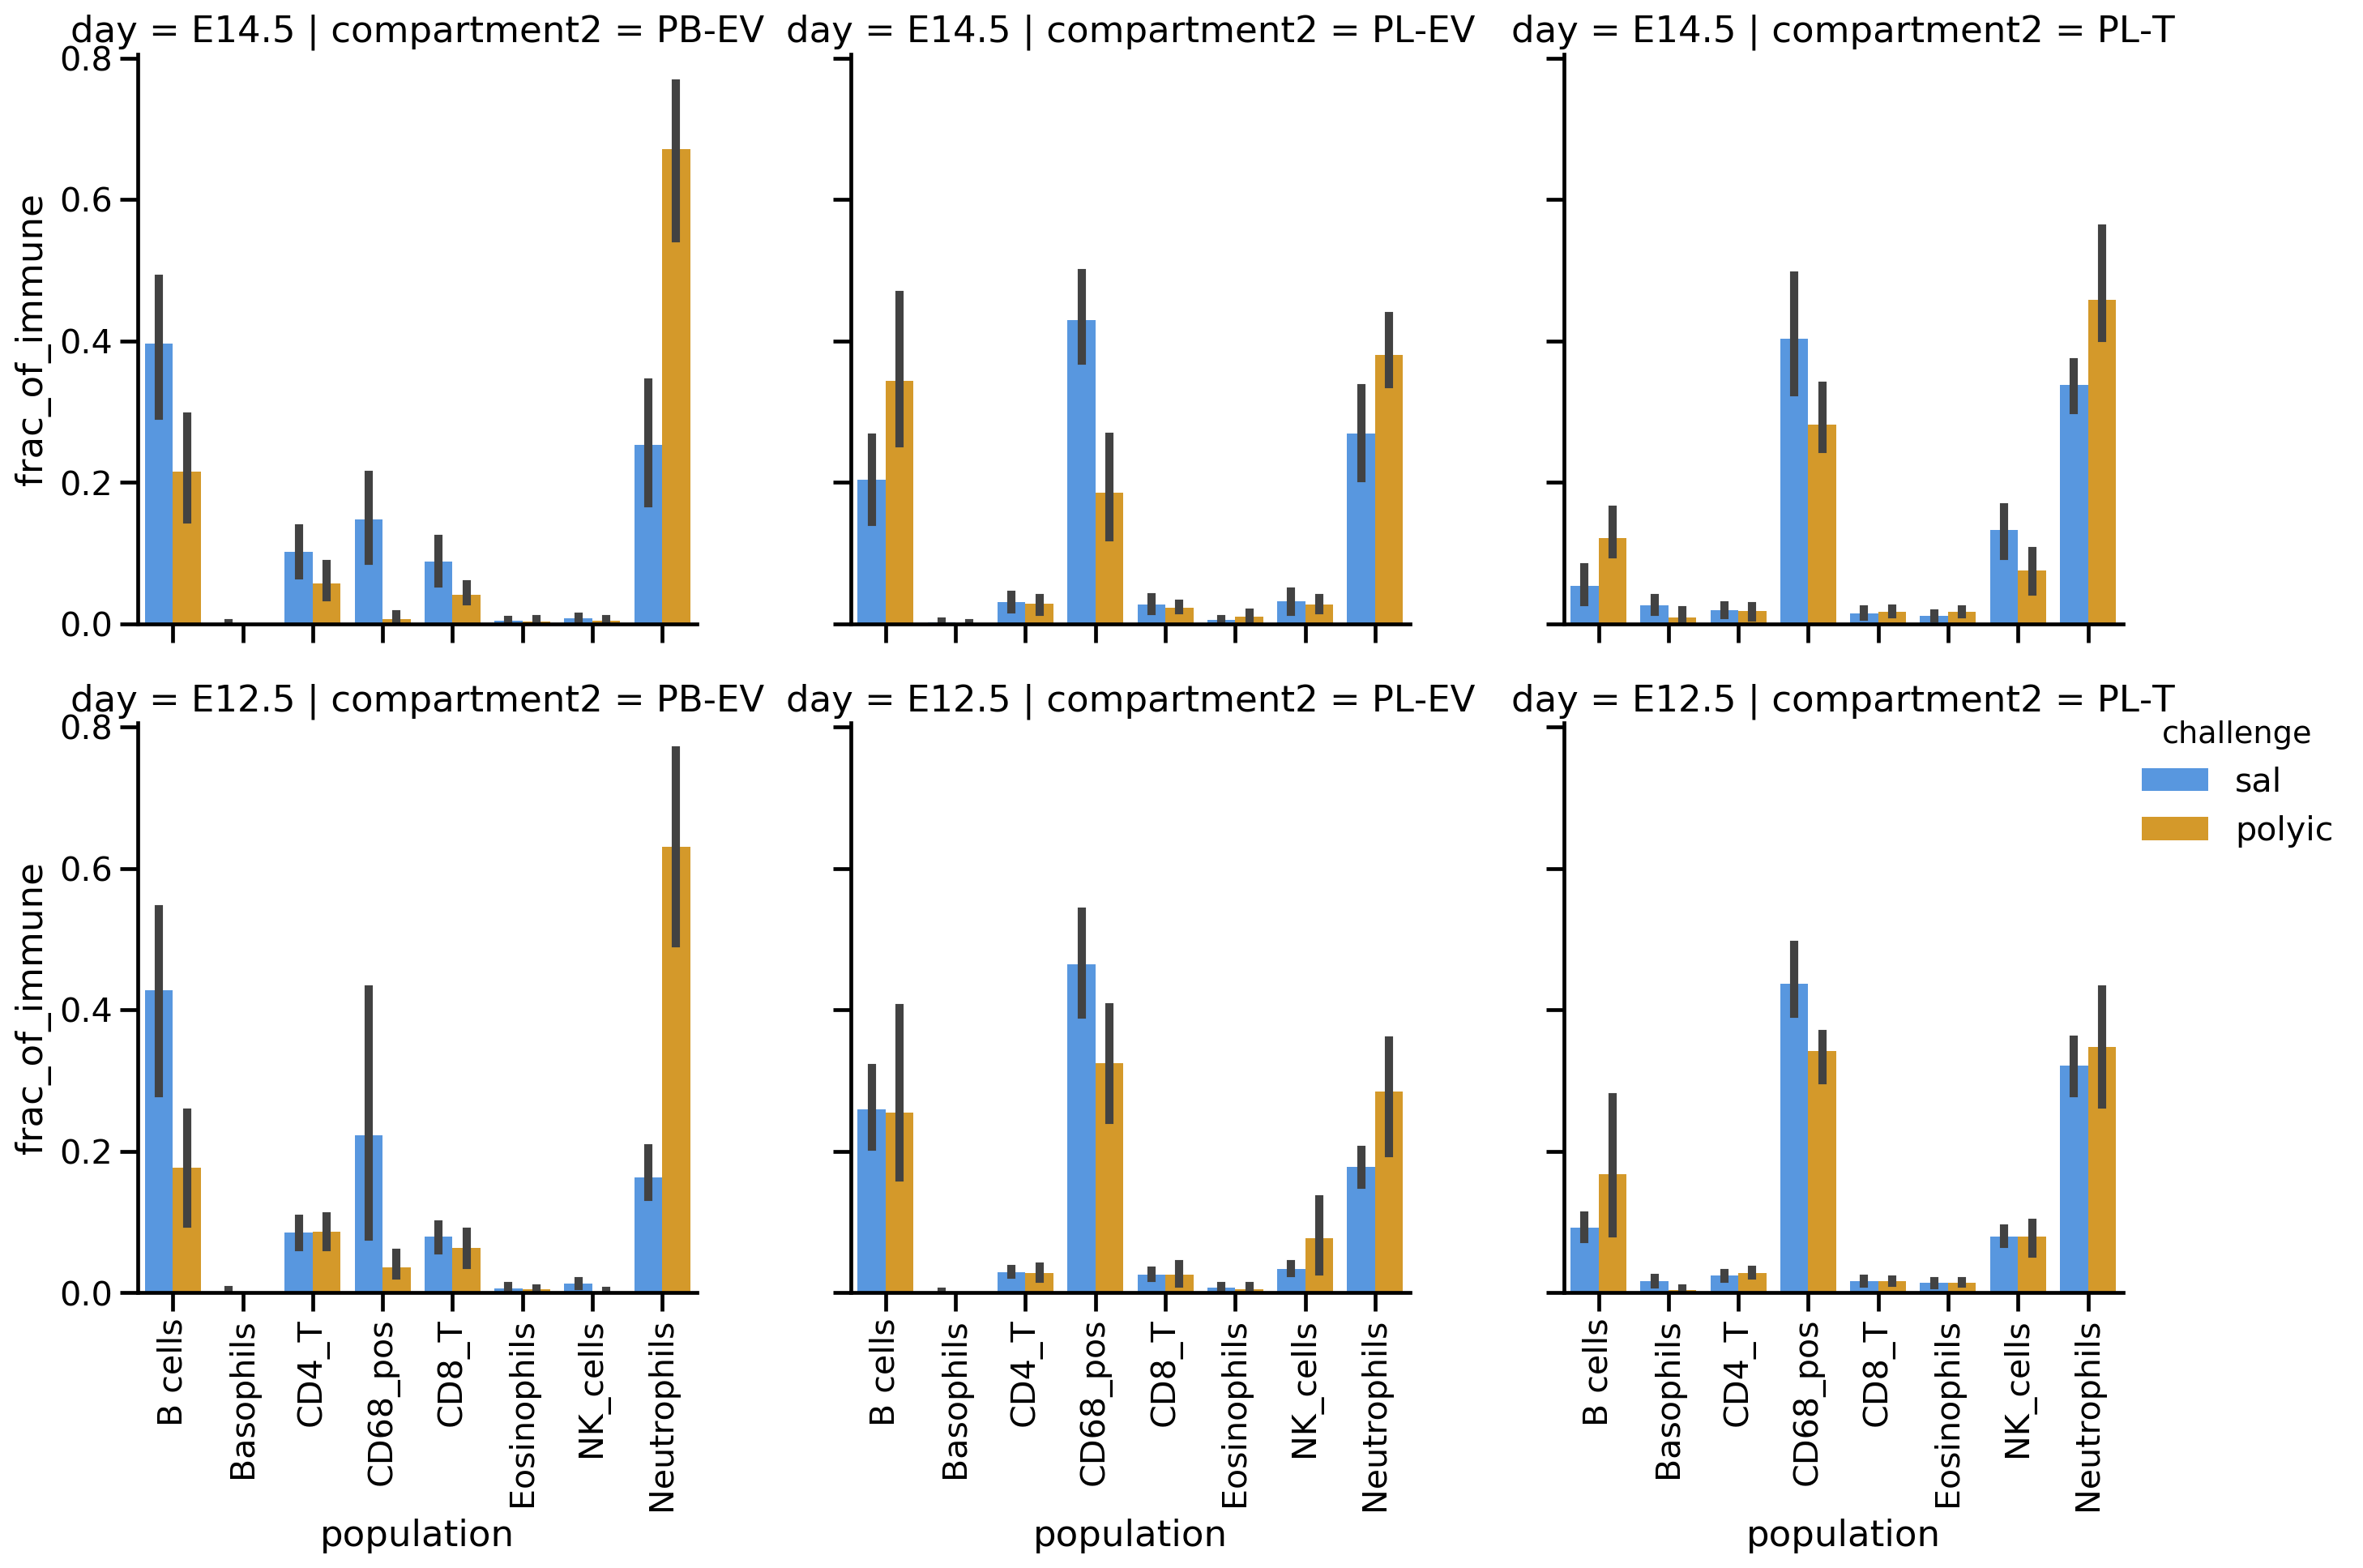

In [271]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = main_counts[main_counts['timePI'].isin(['2hr']) & main_counts['day'].isin(['E12.5', 'E14.5'])]
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [272]:
from scipy.stats import ttest_ind

In [273]:
df = main_counts[(main_counts['day'] == 'E12.5') & (main_counts['timePI'] == '2hr')]
cell_types = df['population'].unique()
compartments = df['compartment2'].unique()
challenges = [('sal', 'polyic')]
t_test_data = pd.DataFrame(columns =['challenge1', 'challenge2', 'compartment2', 'cell_type','log2_ch2divch1','t-stat', 'p-value', 'Stat diff'])
for chal in challenges: 
    for compartment in compartments:
        for cell in cell_types:
                cell_ch1 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[0])]
                cell_ch2 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[1])]

                ch1_mean = cell_ch1.mean()['frac_of_immune']
                ch2_mean = cell_ch2.mean()['frac_of_immune']
                log_diff = np.log2(ch2_mean/ch1_mean)
                t_stat, p = ttest_ind(cell_ch1['frac_of_immune'], cell_ch2['frac_of_immune'])
                alpha = 0.05
                if p > alpha:
                    dist = 'no'
                else:
                    dist = 'yes'
                data_df = pd.DataFrame(data ={'challenge1': [chal[0]],
                                              'challenge2': [chal[1]],
                                              'compartment2': [compartment], 
                                              'cell_type': [cell],
                                              'log2_ch2divch1': [log_diff],
                                              't-stat': [t_stat], 
                                              'p-value': [p], 
                                              'Stat diff':[ dist]})
                t_test_data = t_test_data.append(data_df)
t_test_data.dropna(axis=0, inplace = True)
t_test_data['ch2/ch1'] = t_test_data['challenge2'].str.cat(t_test_data['challenge1'], '/')

In [274]:
import matplotlib.patches as mpatches

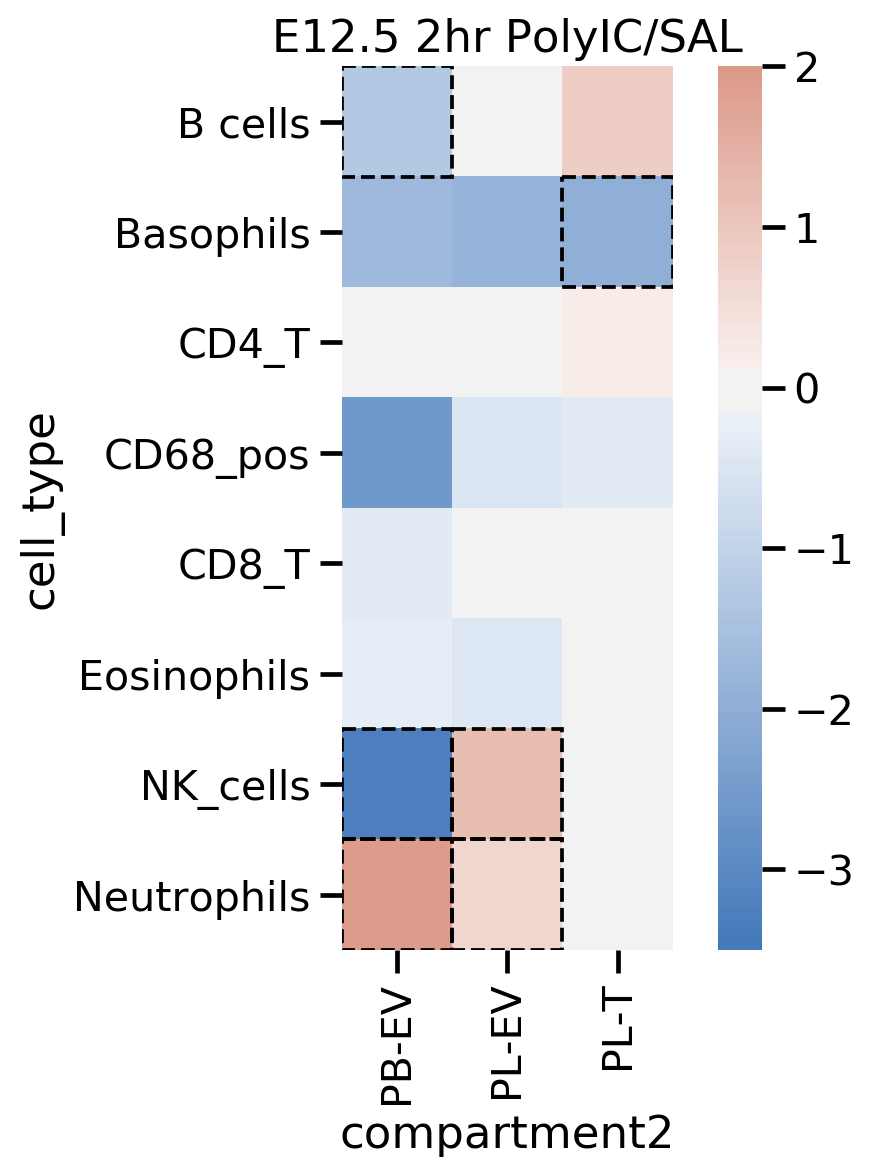

In [275]:
Piv = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'log2_ch2divch1')
Piv_mask = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'p-value')

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.heatmap(Piv,
               cmap = sns.diverging_palette(250, 20, n=200), center = 0, square = True , vmin=-3.5, vmax=2)
mask = Piv_mask < 0.05
for j, i in np.column_stack(np.where(mask)):
      ax.add_patch(
          mpatches.Rectangle(
              (i, j),     # (x,y)
              1,          # width
              1,          # height
              fill = False,
              edgecolor= 'black',
              snap=True,
              alpha = 1,
              label = 'significant',
              linewidth = 1.5,
              linestyle = '--'
          ))
plt.title('E12.5 2hr PolyIC/SAL');

In [276]:
df = main_counts[(main_counts['day'] == 'E14.5') & (main_counts['timePI'] == '2hr')]
cell_types = df['population'].unique()
compartments = df['compartment2'].unique()
challenges = [('sal', 'polyic')]
t_test_data = pd.DataFrame(columns =['challenge1', 'challenge2', 'compartment2', 'cell_type','log2_ch2divch1','t-stat', 'p-value', 'Stat diff'])
for chal in challenges: 
    for compartment in compartments:
        for cell in cell_types:
                cell_ch1 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[0])]
                cell_ch2 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[1])]

                ch1_mean = cell_ch1.mean()['frac_of_immune']
                ch2_mean = cell_ch2.mean()['frac_of_immune']
                log_diff = np.log2(ch2_mean/ch1_mean)
                t_stat, p = ttest_ind(cell_ch1['frac_of_immune'], cell_ch2['frac_of_immune'])
                alpha = 0.05
                if p > alpha:
                    dist = 'no'
                else:
                    dist = 'yes'
                data_df = pd.DataFrame(data ={'challenge1': [chal[0]],
                                              'challenge2': [chal[1]],
                                              'compartment2': [compartment], 
                                              'cell_type': [cell],
                                              'log2_ch2divch1': [log_diff],
                                              't-stat': [t_stat], 
                                              'p-value': [p], 
                                              'Stat diff':[ dist]})
                t_test_data = t_test_data.append(data_df)
t_test_data.dropna(axis=0, inplace = True)
t_test_data['ch2/ch1'] = t_test_data['challenge2'].str.cat(t_test_data['challenge1'], '/')

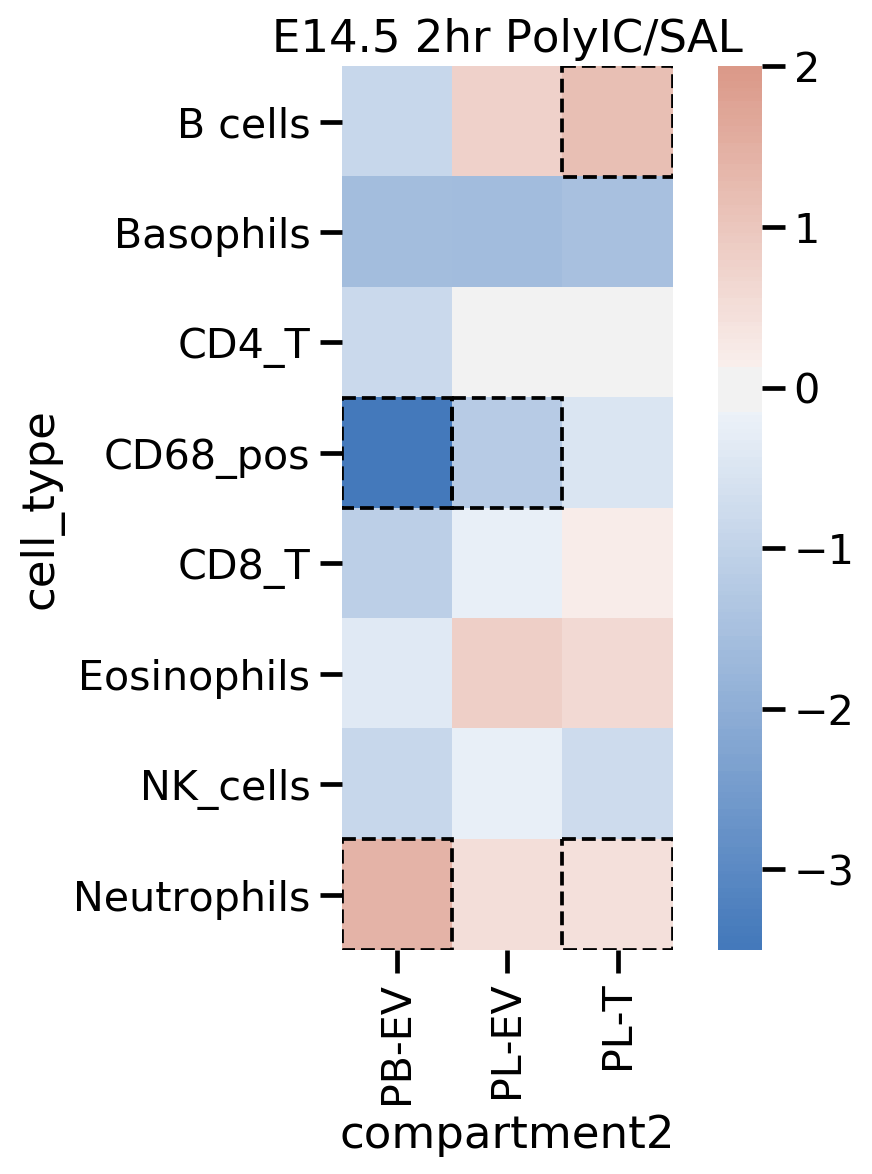

In [277]:
Piv = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'log2_ch2divch1')
Piv_mask = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'p-value')

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.heatmap(Piv,
               cmap = sns.diverging_palette(250, 20, n=200), center = 0, square = True , vmin=-3.5, vmax=2)
mask = Piv_mask < 0.05
for j, i in np.column_stack(np.where(mask)):
      ax.add_patch(
          mpatches.Rectangle(
              (i, j),     # (x,y)
              1,          # width
              1,          # height
              fill = False,
              edgecolor= 'black',
              snap=True,
              alpha = 1,
              label = 'significant',
              linewidth = 1.5,
              linestyle = '--'
          ))
plt.title('E14.5 2hr PolyIC/SAL');

# Extracting total file counts from Cell Engine

In [278]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, '20201216_total_file_counts_CellEngine.csv')
counts_df = pd.read_csv(counts_path)

In [280]:
counts_df.columns

Index(['fcsFileId', 'filename', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI', 'EV | Count', 'Ungated | Count',
       'TIS | Count'],
      dtype='object')

In [281]:
counts_df.rename(columns = {'EV | Count': 'EV', 'TIS | Count': 'T'}, inplace = True)

In [282]:
counts_df.set_index('filename', inplace = True)

In [283]:
opt_counts = counts_df.melt(id_vars = ['cage', 'challenge', 'day', 'id', 'organ', 'origin',
       'surgery_date', 'timePI'], value_vars = ['EV', 'T'], var_name = 'location', value_name = 'counts')

In [284]:
opt_counts['year'] = opt_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
opt_counts['batch_run'] = opt_counts['year'].map(year_dict)
opt_counts.drop(columns = 'year', inplace = True)

In [285]:
opt_counts.head(5)

,cage,challenge,day,id,organ,origin,surgery_date,timePI,location,counts,batch_run
0,3576,sal,E12.5,15,PB,maternal,_102816,24hr,EV,345,2016
1,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,EV,6731,2018
2,428,sal,E12.5,14,PL_F,maternal,_82318,2hr,EV,5816,2018
3,9583,sal,E12.5,18,PL_M,maternal,_80218,2hr,EV,7812,2018
4,9583,sal,E12.5,18,PL_F,maternal,_80218,2hr,EV,3637,2018


In [286]:
PB_mask = (opt_counts['batch_run'].isin(['2016', '2017']) & (opt_counts['organ'] == 'PB'))
opt_counts['location'][PB_mask] = 'EV'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [287]:
opt_counts['organ'].unique()

array(['PB', 'PL_M', 'PL_F', 'PL', 'PL_U', 'decidua'], dtype=object)

In [288]:
PL_mask = (opt_counts['batch_run'].isin(['2016', '2017']) & opt_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U']))
opt_counts['location'][PL_mask] = 'whole'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [289]:
opt_counts['location'].unique()

array(['EV', 'whole', 'T'], dtype=object)

In [290]:
opt_counts['compartment'] = opt_counts['organ'].str.cat(opt_counts['location'], sep= '-')

In [291]:
opt_counts['compartment'].unique()

array(['PB-EV', 'PL_M-EV', 'PL_F-EV', 'PL-EV', 'PL_U-EV', 'decidua-EV',
       'PL_M-whole', 'PL_F-whole', 'PL_M-T', 'PL_F-T', 'PL-T', 'PL_U-T',
       'decidua-T', 'PB-T'], dtype=object)

In [292]:
red_counts = opt_counts[opt_counts['compartment'].isin(['PB-EV', 'PL_M-EV', 'PL_F-EV', 'PL-EV', 
       'PL_M-whole', 'PL_F-whole', 'PL_M-T', 'PL_F-T', 'PL-T', 'PB-T'])]

In [293]:
comp_dict = {'PB-EV': 'PB-EV',
             'PL_M-EV': 'PL-EV',
             'PL_F-EV': 'PL-EV',
             'PL-EV': 'PL-EV',
             'PL_M-whole': 'PL-whole',
             'PL_F-whole':'PL-whole',
             'PL_M-T': 'PL-T', 
             'PL_F-T': 'PL-T',
             'PL-T': 'PL-T'}
red_counts ['compartment2']= red_counts['compartment'].map(comp_dict)
new_counts_clean = red_counts[red_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'PL-whole'])]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [294]:
class_cell_counts = new_counts_clean
class_cell_counts['sample'] = class_cell_counts['cage'].astype(str).str.cat(class_cell_counts['id'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['day'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['challenge'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['timePI'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['compartment2'], sep= '_')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [295]:
class_cell_counts.head(5)

,cage,challenge,day,id,organ,origin,surgery_date,timePI,location,counts,batch_run,compartment,compartment2,sample
0,3576,sal,E12.5,15,PB,maternal,_102816,24hr,EV,345,2016,PB-EV,PB-EV,3576_15_E12.5_sal_24hr_PB-EV
1,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,EV,6731,2018,PL_M-EV,PL-EV,428_14_E12.5_sal_2hr_PL-EV
2,428,sal,E12.5,14,PL_F,maternal,_82318,2hr,EV,5816,2018,PL_F-EV,PL-EV,428_14_E12.5_sal_2hr_PL-EV
3,9583,sal,E12.5,18,PL_M,maternal,_80218,2hr,EV,7812,2018,PL_M-EV,PL-EV,9583_18_E12.5_sal_2hr_PL-EV
4,9583,sal,E12.5,18,PL_F,maternal,_80218,2hr,EV,3637,2018,PL_F-EV,PL-EV,9583_18_E12.5_sal_2hr_PL-EV


In [296]:
cell_counts = pd.DataFrame(data = class_cell_counts.groupby(['cage', 'challenge', 'day', 'id', 'origin',
        'timePI', 'batch_run','compartment2', 'sample']).sum())
cell_counts.reset_index(inplace = True)

In [297]:
cell_counts

,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,counts
0,428,sal,E12.5,14,maternal,2hr,2018,PB-EV,428_14_E12.5_sal_2hr_PB-EV,14303
1,428,sal,E12.5,14,maternal,2hr,2018,PL-EV,428_14_E12.5_sal_2hr_PL-EV,12547
2,428,sal,E12.5,14,maternal,2hr,2018,PL-T,428_14_E12.5_sal_2hr_PL-T,13155
3,438,sal,E14.5,4,maternal,24hr,2017,PB-EV,438_4_E14.5_sal_24hr_PB-EV,211041
4,438,sal,E14.5,4,maternal,24hr,2017,PL-whole,438_4_E14.5_sal_24hr_PL-whole,2592
5,439,sal,E14.5,6,maternal,24hr,2017,PB-EV,439_6_E14.5_sal_24hr_PB-EV,40366
6,439,sal,E14.5,6,maternal,24hr,2017,PL-whole,439_6_E14.5_sal_24hr_PL-whole,4535
7,748,sal,E12.5,5,maternal,24hr,2016,PB-EV,748_5_E12.5_sal_24hr_PB-EV,46040
8,748,sal,E12.5,5,maternal,24hr,2016,PL-whole,748_5_E12.5_sal_24hr_PL-whole,31322
9,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,173512


In [298]:
sample_total = pd.DataFrame(data = cell_counts[['sample', 'counts']].groupby(['sample']).sum())
sample_dict = sample_total.to_dict()

In [299]:
sample_dict

{'counts': {'1136_1_E14.5_sal_2hr_PB-EV': 23651,
  '1136_1_E14.5_sal_2hr_PL-EV': 9253,
  '1136_1_E14.5_sal_2hr_PL-T': 6378,
  '1136_2_E14.5_polyic_24hr_PB-EV': 173512,
  '1136_2_E14.5_polyic_24hr_PL-EV': 2918,
  '1136_2_E14.5_polyic_24hr_PL-T': 2750,
  '1136_4_E14.5_polyic_24hr_PB-EV': 55417,
  '1136_4_E14.5_polyic_24hr_PL-EV': 2762,
  '1136_4_E14.5_polyic_24hr_PL-T': 2980,
  '1137_8_E14.5_sal_24hr_PB-EV': 88626,
  '1137_8_E14.5_sal_24hr_PL-EV': 1943,
  '1137_8_E14.5_sal_24hr_PL-T': 1605,
  '1138_11_E14.5_polyic_2hr_PB-EV': 167312,
  '1138_11_E14.5_polyic_2hr_PL-EV': 27228,
  '1138_11_E14.5_polyic_2hr_PL-T': 18799,
  '1138_13_E14.5_polyic_2hr_PB-EV': 6294,
  '1138_13_E14.5_polyic_2hr_PL-EV': 3180,
  '1138_13_E14.5_polyic_2hr_PL-T': 3082,
  '1139_19_E14.5_polyic_24hr_PB-EV': 18715,
  '1139_19_E14.5_polyic_24hr_PL-EV': 4232,
  '1139_19_E14.5_polyic_24hr_PL-T': 3419,
  '2847_1_E12.5_polyic_24hr_PB-EV': 28112,
  '2847_1_E12.5_polyic_24hr_PL-EV': 2646,
  '2847_1_E12.5_polyic_24hr_PL-T': 484

In [300]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201216_edited_main_cell_counts_CellEngine.csv')
main_counts= pd.read_csv(countsnew_path)
main_counts.loc[:, ['batch_run', 'cage', 'id']] = main_counts.loc[:, ['batch_run', 'cage', 'id']].astype(str)

In [302]:
main_counts.loc[:,'sample_total2'] = main_counts['sample'].map(sample_dict['counts'])
main_counts['frac_of_immune2'] = main_counts['counts']/main_counts['sample_total2'] 

In [303]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
countsnew_path = os.path.join(subsample_path, '20201216_edited_main_cell_counts_CellEngine.csv')
main_counts.to_csv(countsnew_path, index = False)

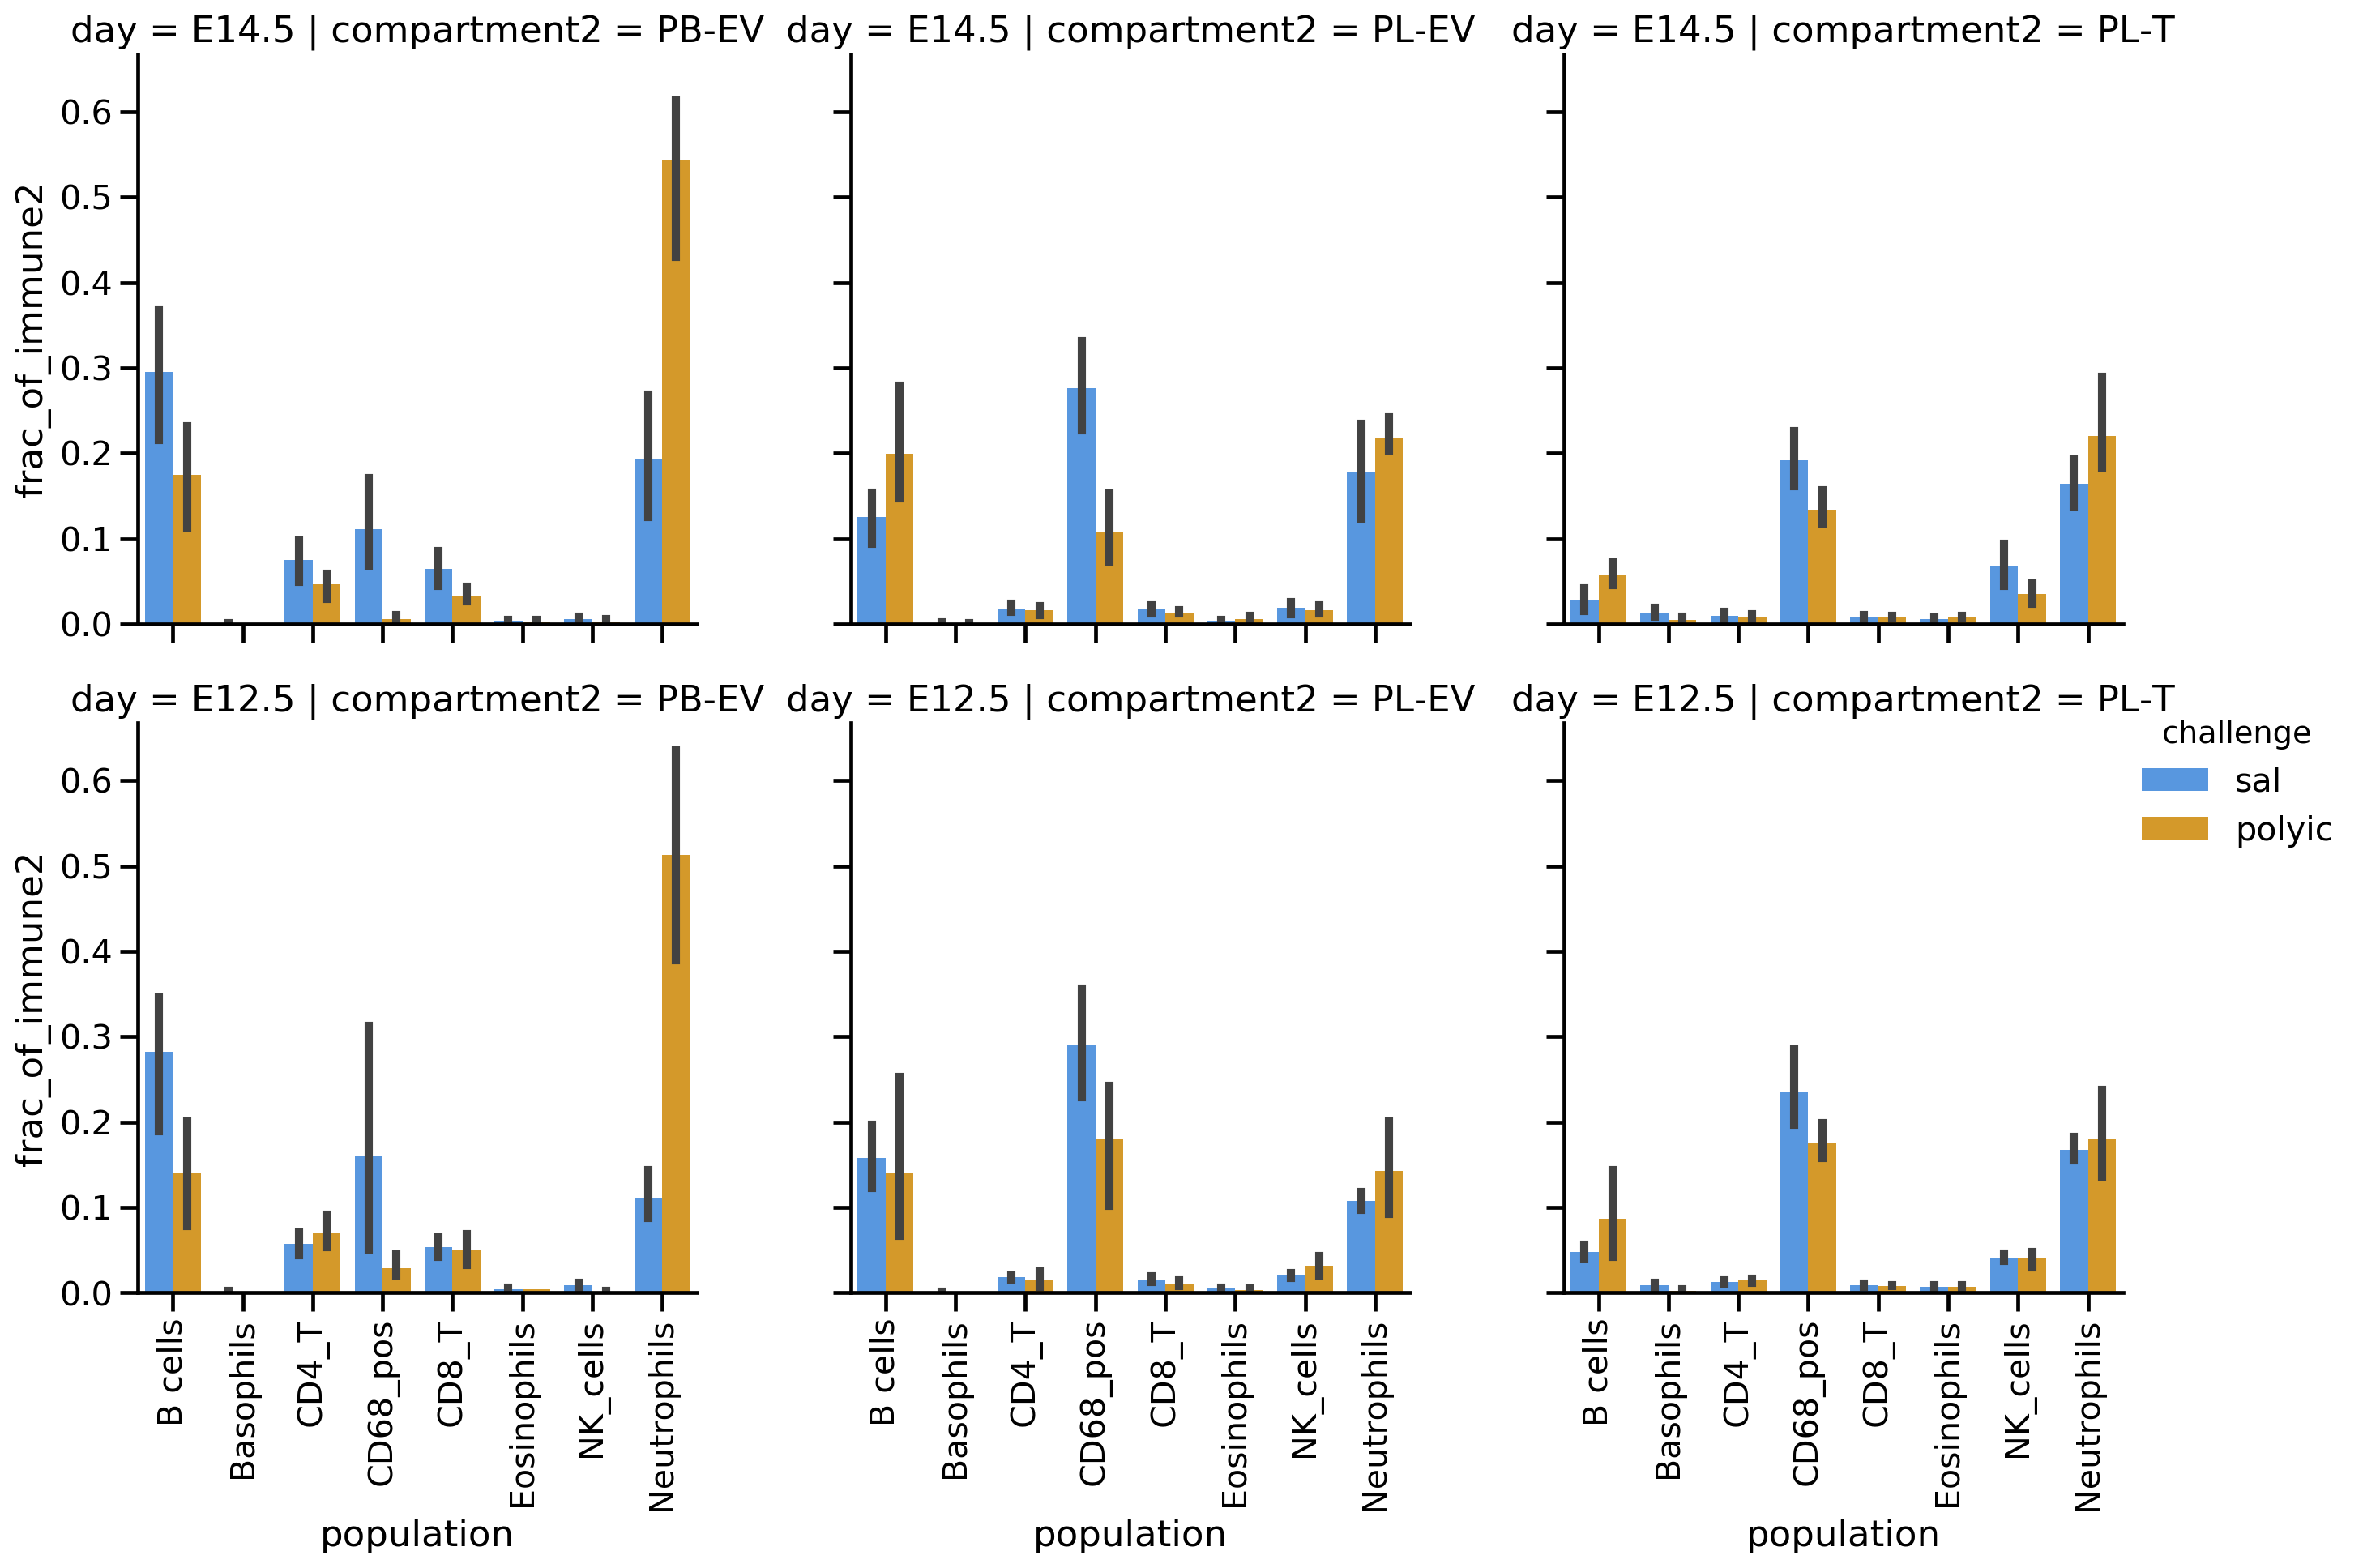

In [304]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = main_counts[main_counts['timePI'].isin(['2hr']) & main_counts['day'].isin(['E12.5', 'E14.5'])]
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_immune2',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [305]:
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches

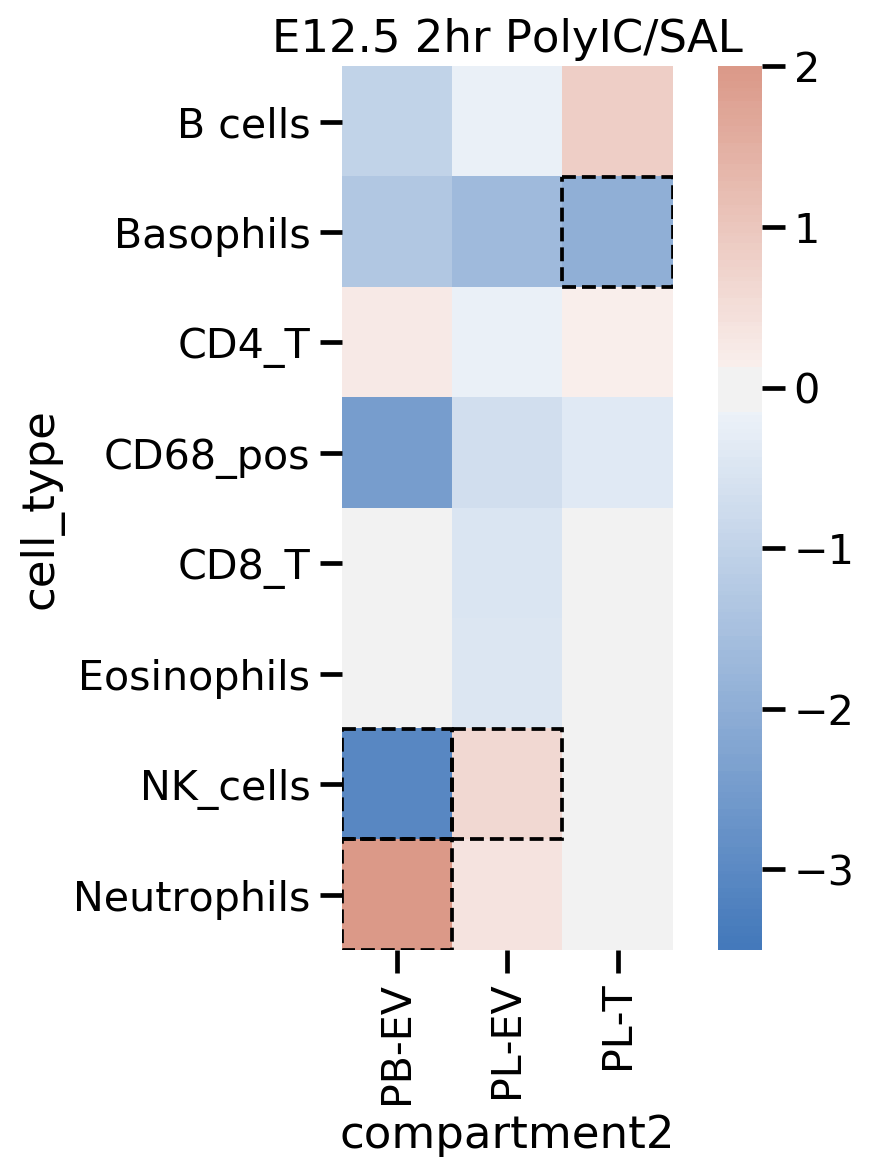

In [306]:
df = main_counts[(main_counts['day'] == 'E12.5') & (main_counts['timePI'] == '2hr')]
cell_types = df['population'].unique()
compartments = df['compartment2'].unique()
challenges = [('sal', 'polyic')]
t_test_data = pd.DataFrame(columns =['challenge1', 'challenge2', 'compartment2', 'cell_type','log2_ch2divch1','t-stat', 'p-value', 'Stat diff'])
for chal in challenges: 
    for compartment in compartments:
        for cell in cell_types:
                cell_ch1 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[0])]
                cell_ch2 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[1])]

                ch1_mean = cell_ch1.mean()['frac_of_immune2']
                ch2_mean = cell_ch2.mean()['frac_of_immune2']
                log_diff = np.log2(ch2_mean/ch1_mean)
                t_stat, p = ttest_ind(cell_ch1['frac_of_immune2'], cell_ch2['frac_of_immune2'])
                alpha = 0.05
                if p > alpha:
                    dist = 'no'
                else:
                    dist = 'yes'
                data_df = pd.DataFrame(data ={'challenge1': [chal[0]],
                                              'challenge2': [chal[1]],
                                              'compartment2': [compartment], 
                                              'cell_type': [cell],
                                              'log2_ch2divch1': [log_diff],
                                              't-stat': [t_stat], 
                                              'p-value': [p], 
                                              'Stat diff':[ dist]})
                t_test_data = t_test_data.append(data_df)
t_test_data.dropna(axis=0, inplace = True)
t_test_data['ch2/ch1'] = t_test_data['challenge2'].str.cat(t_test_data['challenge1'], '/')

Piv = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'log2_ch2divch1')
Piv_mask = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'p-value')

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.heatmap(Piv,
               cmap = sns.diverging_palette(250, 20, n=200), center = 0, square = True , vmin=-3.5, vmax=2)
mask = Piv_mask < 0.05
for j, i in np.column_stack(np.where(mask)):
      ax.add_patch(
          mpatches.Rectangle(
              (i, j),     # (x,y)
              1,          # width
              1,          # height
              fill = False,
              edgecolor= 'black',
              snap=True,
              alpha = 1,
              label = 'significant',
              linewidth = 1.5,
              linestyle = '--'
          ))
plt.title('E12.5 2hr PolyIC/SAL');

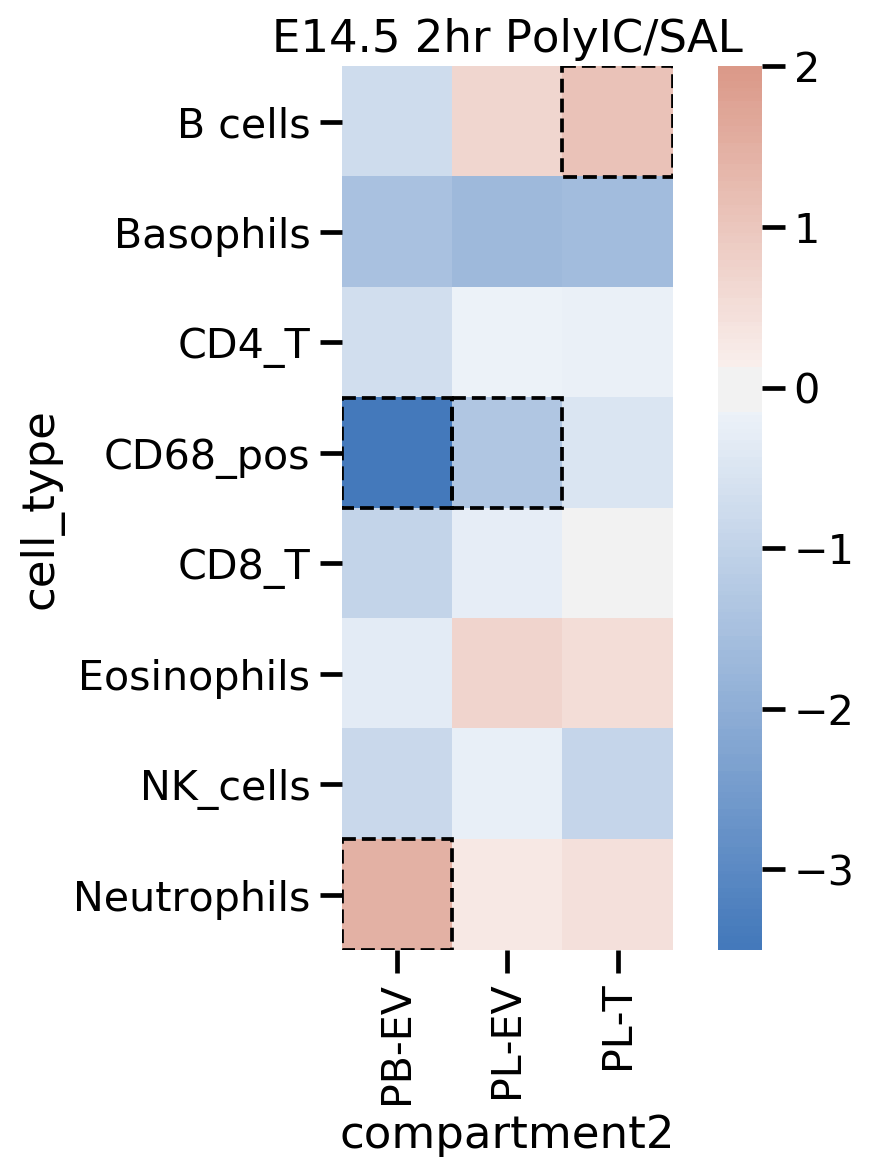

In [307]:
df = main_counts[(main_counts['day'] == 'E14.5') & (main_counts['timePI'] == '2hr')]
cell_types = df['population'].unique()
compartments = df['compartment2'].unique()
challenges = [('sal', 'polyic')]
t_test_data = pd.DataFrame(columns =['challenge1', 'challenge2', 'compartment2', 'cell_type','log2_ch2divch1','t-stat', 'p-value', 'Stat diff'])
for chal in challenges: 
    for compartment in compartments:
        for cell in cell_types:
                cell_ch1 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[0])]
                cell_ch2 = df[(df['population']== cell) & 
                              (df['compartment2']== compartment) & 
                              (df['challenge']== chal[1])]

                ch1_mean = cell_ch1.mean()['frac_of_immune2']
                ch2_mean = cell_ch2.mean()['frac_of_immune2']
                log_diff = np.log2(ch2_mean/ch1_mean)
                t_stat, p = ttest_ind(cell_ch1['frac_of_immune2'], cell_ch2['frac_of_immune2'])
                alpha = 0.05
                if p > alpha:
                    dist = 'no'
                else:
                    dist = 'yes'
                data_df = pd.DataFrame(data ={'challenge1': [chal[0]],
                                              'challenge2': [chal[1]],
                                              'compartment2': [compartment], 
                                              'cell_type': [cell],
                                              'log2_ch2divch1': [log_diff],
                                              't-stat': [t_stat], 
                                              'p-value': [p], 
                                              'Stat diff':[ dist]})
                t_test_data = t_test_data.append(data_df)
t_test_data.dropna(axis=0, inplace = True)
t_test_data['ch2/ch1'] = t_test_data['challenge2'].str.cat(t_test_data['challenge1'], '/')

Piv = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'log2_ch2divch1')
Piv_mask = t_test_data[t_test_data['ch2/ch1'] == 'polyic/sal'].pivot_table(index = 'cell_type', columns = 'compartment2', values = 'p-value')

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.heatmap(Piv,
               cmap = sns.diverging_palette(250, 20, n=200), center = 0, square = True , vmin=-3.5, vmax=2)
mask = Piv_mask < 0.05
for j, i in np.column_stack(np.where(mask)):
      ax.add_patch(
          mpatches.Rectangle(
              (i, j),     # (x,y)
              1,          # width
              1,          # height
              fill = False,
              edgecolor= 'black',
              snap=True,
              alpha = 1,
              label = 'significant',
              linewidth = 1.5,
              linestyle = '--'
          ))
plt.title('E14.5 2hr PolyIC/SAL');

In [170]:
main_counts.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,location,batch_run,compartment,compartment2,sample,sample_cell,counts,sample_total,frac_of_immune,sample_total2,frac_of_immune2
0,B cells,428,sal,E12.5,14,PB,maternal,_82318,2hr,EV,2018,PB-EV,PB-EV,428_14_E12.5_sal_2hr_PB-EV,428_14_E12.5_sal_2hr_PB-EV_B cells,5201,10270,0.506426,14303,0.363630
1,B cells,428,sal,E12.5,14,PL_F,maternal,_82318,2hr,EV,2018,PL_F-EV,PL-EV,428_14_E12.5_sal_2hr_PL-EV,428_14_E12.5_sal_2hr_PL-EV_B cells,326,8673,0.037588,12547,0.025982
2,B cells,428,sal,E12.5,14,PL_F,maternal,_82318,2hr,TIS,2018,PL_F-TIS,PL-T,428_14_E12.5_sal_2hr_PL-T,428_14_E12.5_sal_2hr_PL-T_B cells,274,7881,0.034767,13155,0.020829
3,B cells,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,EV,2018,PL_M-EV,PL-EV,428_14_E12.5_sal_2hr_PL-EV,428_14_E12.5_sal_2hr_PL-EV_B cells,488,8673,0.056267,12547,0.038894
4,B cells,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,TIS,2018,PL_M-TIS,PL-T,428_14_E12.5_sal_2hr_PL-T,428_14_E12.5_sal_2hr_PL-T_B cells,314,7881,0.039843,13155,0.023869


In [326]:
bl = main_counts[(main_counts['challenge'] == 'sal') & (main_counts['timePI'] == '2hr') & (main_counts['day'] == 'E14.5')]

In [327]:
cell_list = main_counts['population'].unique().tolist()
bl_counts_piv = bl.pivot_table(index = ['compartment2',  
                                                 'day', 'challenge',
                                                 'timePI', 'cage', 'id'],
                                        columns = 'population', 
                                        values = 'frac_of_immune2')
bl_counts_piv.reset_index(inplace = True)
bl_counts_piv.loc[:,cell_list] = bl_counts_piv.loc[:,cell_list].fillna(0)
bl_counts_piv.loc[:, 'cage'] = bl_counts_piv.loc[:, 'cage'].astype('category')
composite = bl_counts_piv.groupby(['compartment2']).agg(['mean', 'sem'])
mean_sem_comp = composite.reorder_levels([1, 0], axis = 1) 
mean_sem_comp.sort_index(axis = 0, ascending = False, inplace = True)
composite_T = mean_sem_comp['mean'].transpose()
composite_T.reset_index(inplace = True)
int_to_cell = composite_T[['index']].to_dict()
bars_dict = {}
for leiden in composite_T.index:
    bars_dict[leiden] = composite_T.iloc[leiden, 1:]
height_dict = {}
for leiden in composite_T.index:
    height_dict[leiden] = composite_T.iloc[leiden+1:,1:].sum().tolist()
composite_T.sum(axis = 0)

compartment2
index    B cellsBasophilsCD4_TCD68_posCD8_TEosinophilsN...
PL-T                                              0.487031
PL-EV                                             0.637927
PB-EV                                             0.748874
dtype: object

In [328]:
leiden_color_dictv2 = {'B cells': '#355C7D',
 'CD4_T': '#F8B195',
 'CD8_T': '#F67280',
 'Eosinophils': '#A30059',
 'Basophils': '#b4b4ee',
 'CD68_pos': '#6C5B7B',
 'NK_cells': '#b4d1ee',
 'Neutrophils': '#999097'}

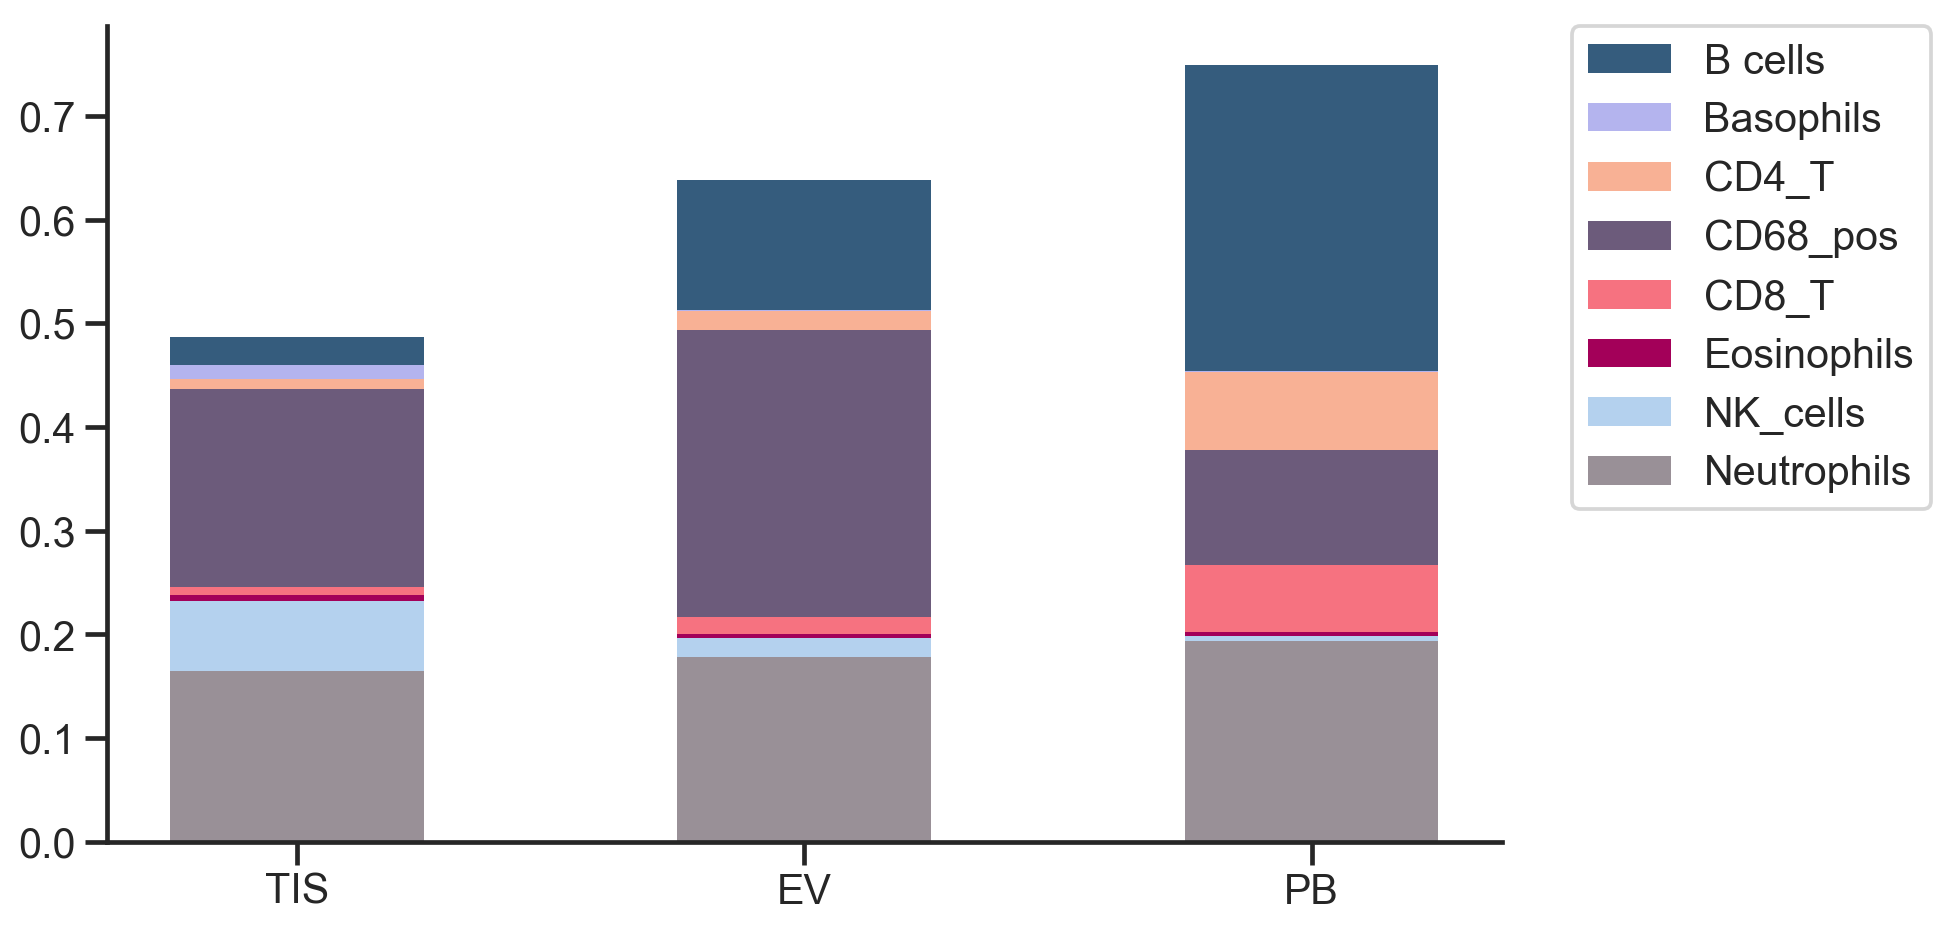

In [329]:
sns.set_style("ticks")
plt.figure(figsize=(10,6)) 
# The position of the bars on the x-axis
r = [0,0.2,0.4]
 
# Names of group and bar width
names = ['TIS','EV','PB']
barWidth = 0.10

for leiden in composite_T.index:
    plt.bar(r, bars_dict[leiden], color = leiden_color_dictv2[int_to_cell['index'][leiden]], bottom = height_dict[leiden], width=barWidth, linewidth = 0)
plt.xticks(r, names);
plt.legend(composite_T['index'], bbox_to_anchor=(1.05, 1), borderaxespad=0., ncol=1)
sns.despine(right = True, top = True)